# IMPORTING DATASET

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cardekho.csv')
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# DATA PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [5]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [6]:
df.duplicated().sum()

167

In [7]:
df = df.drop_duplicates(keep='first', ignore_index=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326161,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.808760,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [10]:
df.columns.to_list()

['car_name',
 'brand',
 'model',
 'vehicle_age',
 'km_driven',
 'seller_type',
 'fuel_type',
 'transmission_type',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

In [11]:
df[df['brand']=='Maruti'].describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4.933000e+03
mean,5.945875,51386.572268,22.425520,1142.044192,74.530935,5.146564,4.869854e+05
std,3.164282,33725.764722,3.452322,164.227949,13.185203,0.530313,2.153691e+05
min,0.000000,1000.000000,14.000000,793.000000,38.400000,4.000000,4.000000e+04
25%,4.000000,28314.000000,20.400000,998.000000,67.050000,5.000000,3.200000e+05
50%,5.000000,48000.000000,21.790000,1197.000000,74.000000,5.000000,4.650000e+05
75%,8.000000,69001.000000,24.300000,1248.000000,83.140000,5.000000,6.500000e+05
max,29.000000,480000.000000,33.540000,1590.000000,103.260000,7.000000,1.225000e+06


# DATA CLEANING
- checking for typos
- datatype conversion

In [12]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [13]:
cat_col = df.select_dtypes(include='object').columns.tolist()
for i in cat_col:
    print(df[i].value_counts(), '\n\n')

car_name
Hyundai i20           898
Maruti Swift Dzire    875
Maruti Swift          774
Maruti Alto           768
Honda City            750
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64 


brand
Maruti           4933
Hyundai          2952
Honda            1476
Mahindra          999
Toyota            789
Ford              776
Volkswagen        614
Renault           527
BMW               436
Tata              421
Skoda             333
Mercedes-Benz     332
Audi              190
Datsun            170
Jaguar             58
Land Rover         50
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus               9
Isuzu               7
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG       

In [14]:
cat_col

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [15]:
df[cat_col] = df[cat_col].astype('category')

In [16]:
df.dtypes

car_name             category
brand                category
model                category
vehicle_age             int64
km_driven               int64
seller_type          category
fuel_type            category
transmission_type    category
mileage               float64
engine                  int64
max_power             float64
seats                   int64
selling_price           int64
dtype: object

# EXPLORATORY DATA ANALYSIS

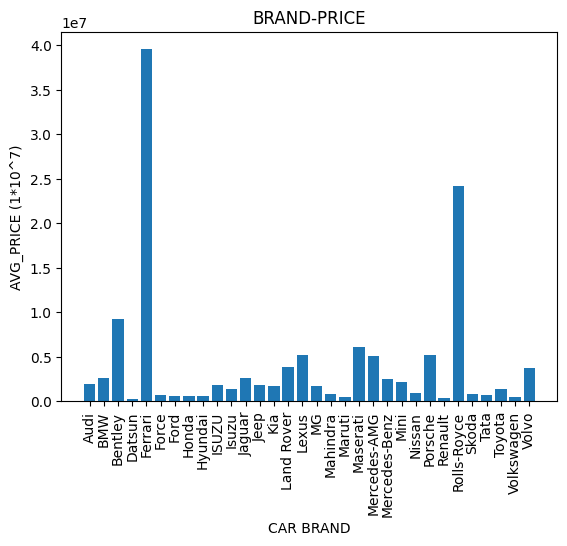

In [17]:
import matplotlib.pyplot as plt

data = df.groupby('brand', observed=False)['selling_price'].mean().reset_index()
plt.bar(data['brand'], data['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('CAR BRAND')
plt.ylabel('AVG_PRICE (1*10^7)')
plt.title('BRAND-PRICE')
plt.show()

# Ferrari cars are costliest

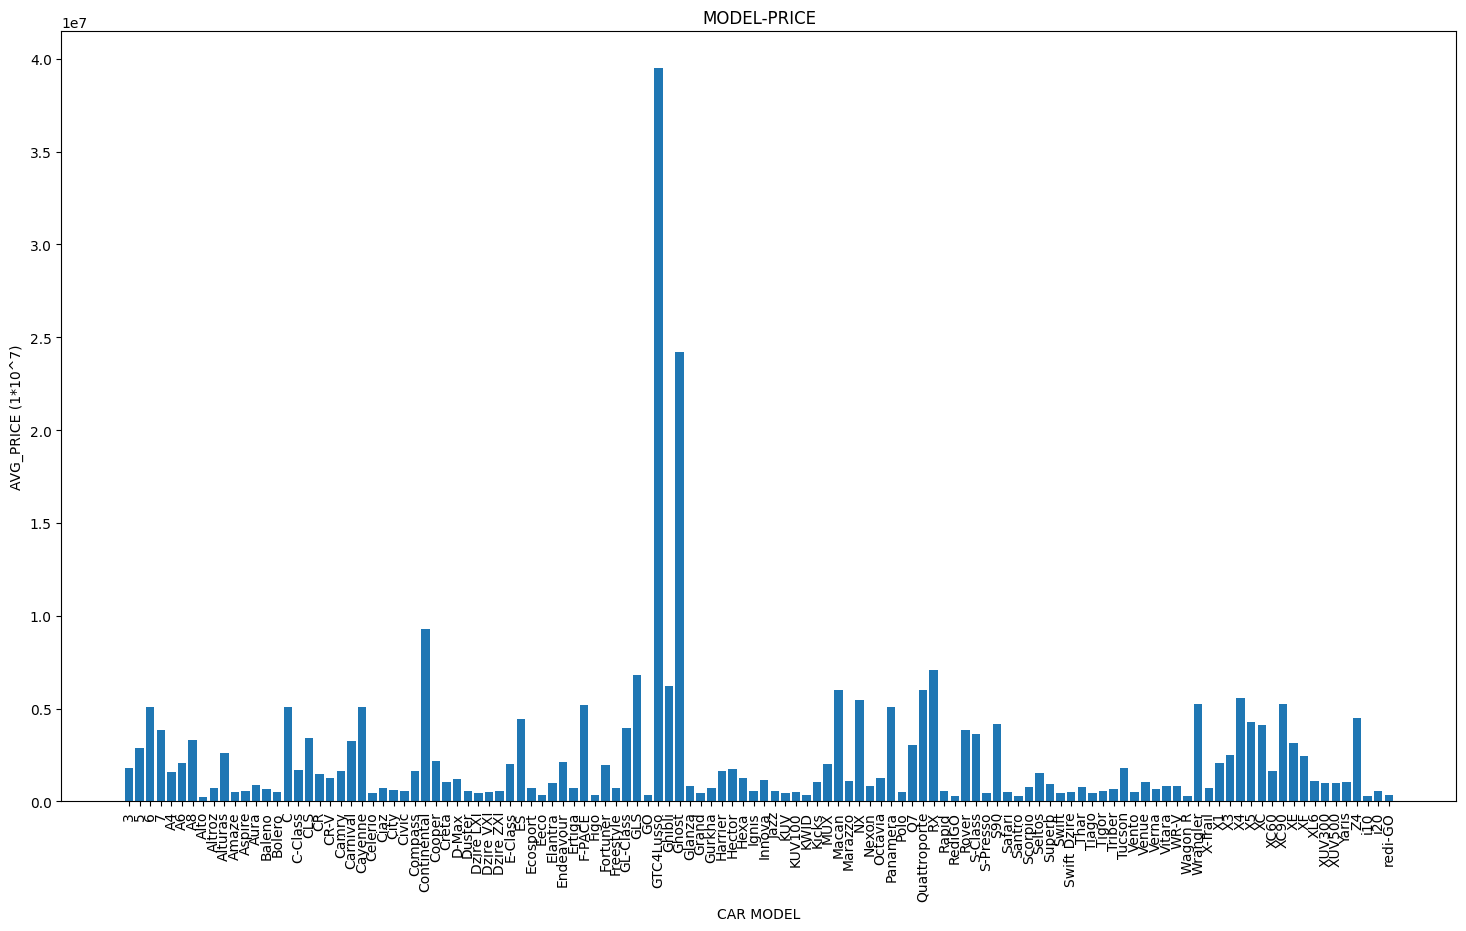

In [18]:
plt.figure(figsize=(18,10))
dataX = df.groupby('model',observed=False)['selling_price'].mean().reset_index()
plt.bar(dataX['model'], dataX['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('CAR MODEL')
plt.ylabel('AVG_PRICE (1*10^7)')
plt.title('MODEL-PRICE')
plt.show()

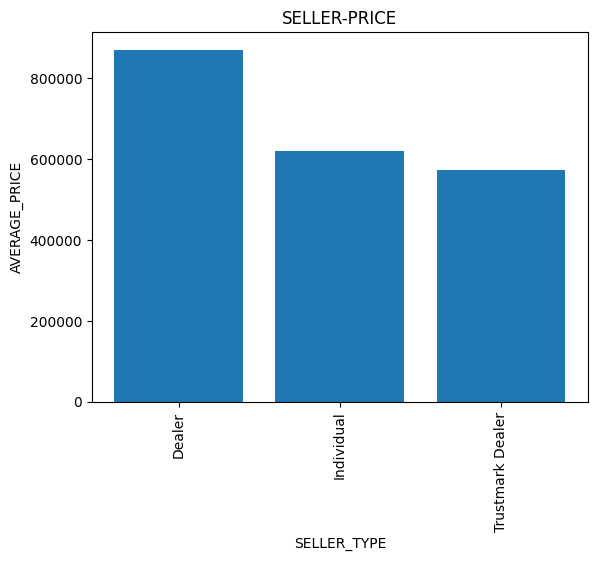

In [19]:
data3 = df.groupby('seller_type', observed=False)['selling_price'].mean().reset_index()
plt.bar(data3['seller_type'], data3['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('SELLER_TYPE')
plt.ylabel('AVERAGE_PRICE')
plt.title('SELLER-PRICE')
plt.show()

# dealer's cars are expensive

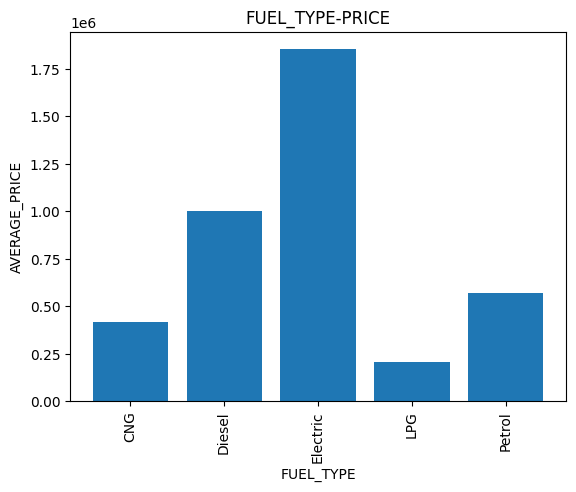

In [20]:
data4 = df.groupby('fuel_type', observed=False)['selling_price'].mean().reset_index()
plt.bar(data4['fuel_type'], data4['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('FUEL_TYPE')
plt.ylabel('AVERAGE_PRICE')
plt.title('FUEL_TYPE-PRICE')
plt.show()

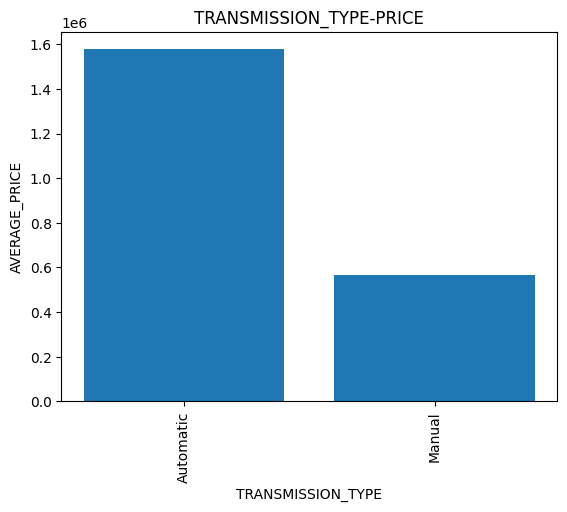

In [21]:
data4 = df.groupby('transmission_type', observed=False)['selling_price'].mean().reset_index()
plt.bar(data4['transmission_type'], data4['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('TRANSMISSION_TYPE')
plt.ylabel('AVERAGE_PRICE')
plt.title('TRANSMISSION_TYPE-PRICE')
plt.show()

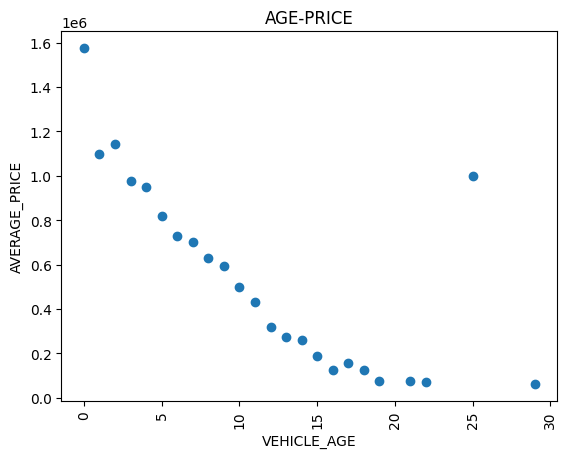

In [22]:
data5 = df.groupby('vehicle_age', observed=False)['selling_price'].mean().reset_index()
plt.scatter(data5['vehicle_age'], data5['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('VEHICLE_AGE')
plt.ylabel('AVERAGE_PRICE')
plt.title('AGE-PRICE')
plt.show()

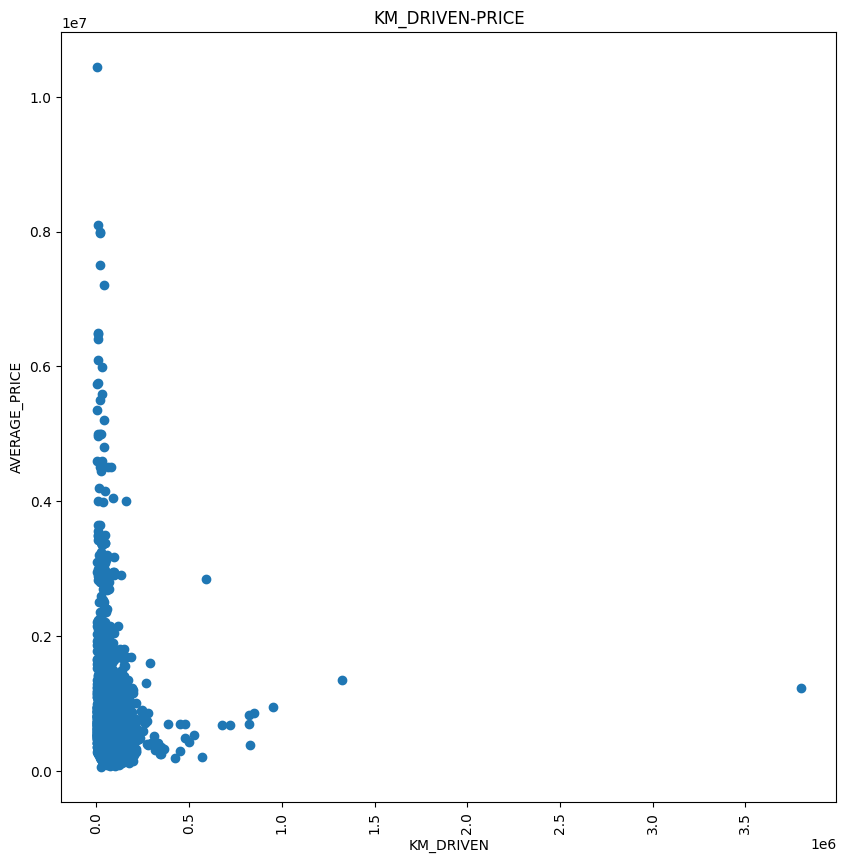

In [23]:
plt.figure(figsize=(10,10))
data6 = df.groupby('km_driven', observed=False)['selling_price'].mean().reset_index()
plt.scatter(data6['km_driven'], data6['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('KM_DRIVEN')
plt.ylabel('AVERAGE_PRICE')
plt.title('KM_DRIVEN-PRICE')
plt.show()

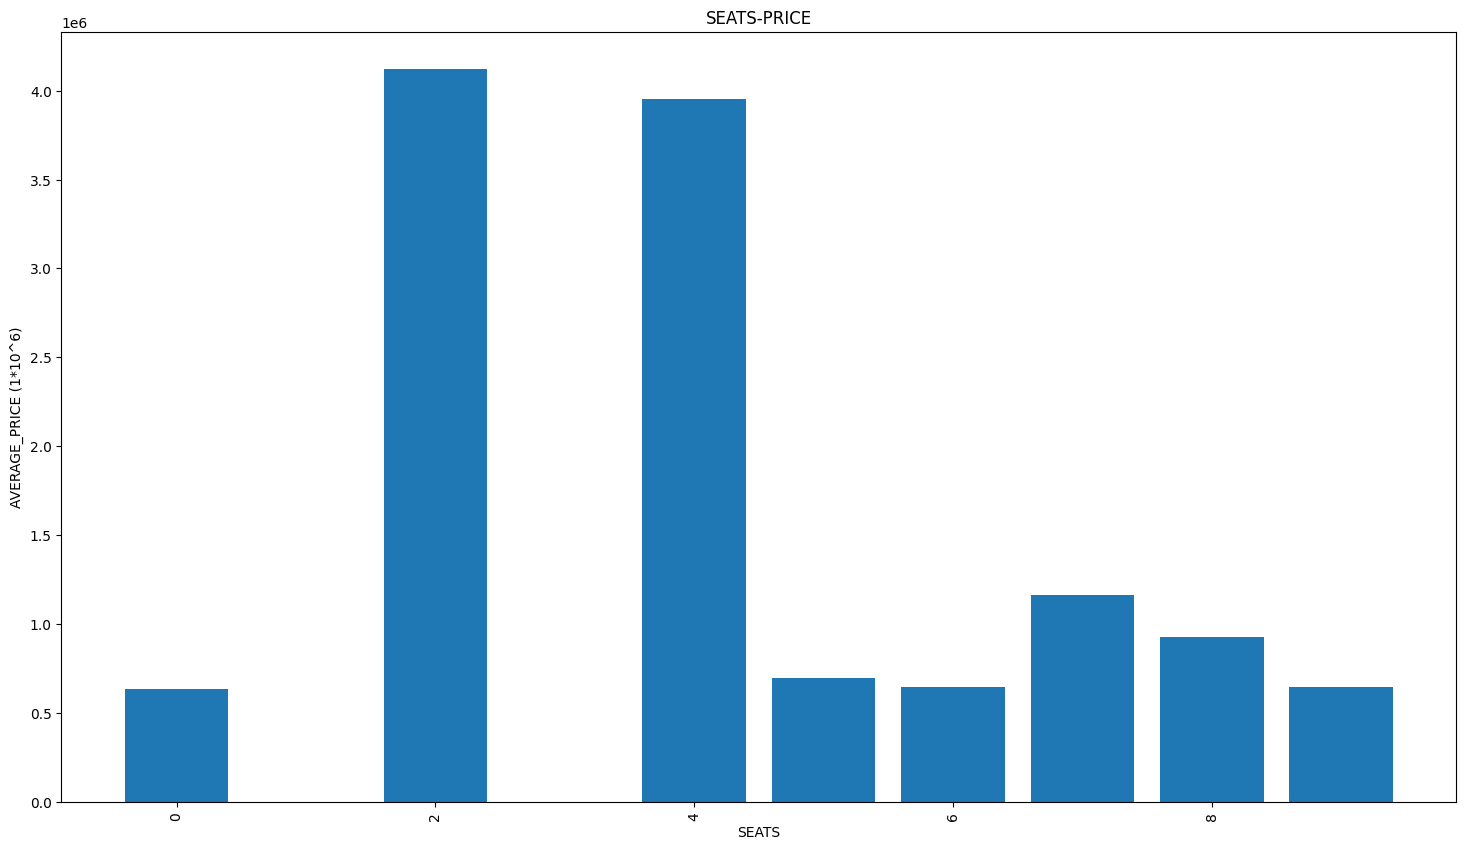

In [24]:
plt.figure(figsize=(18,10))
data7 = df.groupby('seats', observed=False)['selling_price'].mean().reset_index()
plt.bar(data7['seats'], data7['selling_price'])
plt.xticks(rotation=90)
plt.xlabel('SEATS')
plt.ylabel('AVERAGE_PRICE (1*10^6)')
plt.title('SEATS-PRICE')
plt.show()

<Axes: >

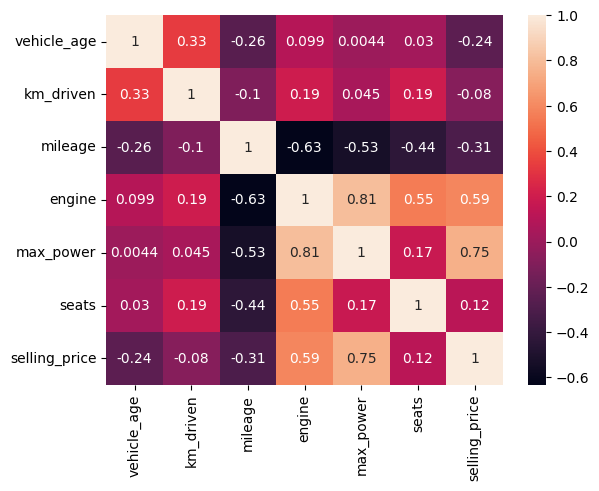

In [25]:
import seaborn as sns
data = df[['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']]
sns.heatmap(data.corr(), annot=True)

In [26]:
cat_col

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [27]:
df['seller_type'].unique()

['Individual', 'Dealer', 'Trustmark Dealer']
Categories (3, object): ['Dealer', 'Individual', 'Trustmark Dealer']

In [28]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15239,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5
15240,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7
15241,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5
15242,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

encoder1 = OneHotEncoder(sparse_output=False, drop='first')
encoder2 = OneHotEncoder(sparse_output=False, drop='first')
encoder3 = OneHotEncoder(sparse_output=False, drop='first')
encoder4 = OneHotEncoder(sparse_output=False, drop='first')
encoder5 = OneHotEncoder(sparse_output=False, drop='first')
encoder6 = OneHotEncoder(sparse_output=False, drop='first')

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('car_name', encoder1, ['car_name']),
        ('brand', encoder2, ['brand']),
        ('model', encoder3, ['model']),
        ('seller_type', encoder4, ['seller_type']),
        ('fuel_type', encoder5, ['fuel_type']),
        ('transmission_type', encoder6, ['transmission_type'])
    ],
    remainder='passthrough'  
)

# Create a pipeline with the preprocessor
pipeline = Pipeline(
    [('preprocessor', preprocessor)]
)

# Fit and transform the DataFrame
encoded_df = pipeline.fit_transform(X)

# Convert the result to a DataFrame for easier interpretation
encoded_df = pd.DataFrame(encoded_df, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

In [31]:
import pickle

pickle.dump(pipeline, open('pipe.pkl', 'wb'))

In [32]:
encoded_df

,car_name__car_name_Audi A6,car_name__car_name_Audi A8,car_name__car_name_Audi Q7,car_name__car_name_BMW 3,car_name__car_name_BMW 5,car_name__car_name_BMW 6,car_name__car_name_BMW 7,car_name__car_name_BMW X1,car_name__car_name_BMW X3,car_name__car_name_BMW X4,...,fuel_type__fuel_type_Electric,fuel_type__fuel_type_LPG,fuel_type__fuel_type_Petrol,transmission_type__transmission_type_Manual,remainder__vehicle_age,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__seats
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,120000.0,19.70,796.0,46.30,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,5.0,20000.0,18.90,1197.0,82.00,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,11.0,60000.0,17.00,1197.0,80.00,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,37000.0,20.92,998.0,67.10,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,30000.0,22.77,1498.0,98.59,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,10723.0,19.81,1086.0,68.05,5.0
15240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,18000.0,17.50,1373.0,91.10,7.0
15241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,67000.0,21.14,1498.0,103.52,5.0
15242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,3800000.0,16.00,2179.0,140.00,7.0


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df, Y, test_size=0.2)

In [34]:
X_train.shape

(12195, 283)

In [35]:
X_test.shape

(3049, 283)

# MODEL BUILDING

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
def adjusted_r2_score(r2, X_test):
    k = 6
    n = X_test.shape[0]
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

In [38]:
def model_build(model, param_grid):
    grid = GridSearchCV(model,param_grid={}, cv=10, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_estimator_

In [39]:
def evaluation(model, param_grid):
    model = model_build(model, param_grid)
    y_train_pred = model.predict(X_train).round(4)
    y_test_pred = model.predict(X_test).round(4)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)
    adj_r2_train = adjusted_r2_score(r2, X_train)
    adj_r2_test = adjusted_r2_score(r2, X_test)
    
    return [mae, mse, rmse, r2, adj_r2_train, adj_r2_test]

In [40]:
dt = DecisionTreeRegressor()
para = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter' : ["best", "random"],
    'max_depth' : [None, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 4, 6, 8, 10,15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10,12],
    'max_features' : [None, "sqrt", "log2"],
}

In [41]:
rf = RandomForestRegressor()
para2 = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'criterion' : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth' : [None, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 4, 6, 8, 10,15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10,12],
    'max_features' : [None, "sqrt", "log2"],
    'bootstrap' : [True, False],
}

In [42]:
gb = GradientBoostingRegressor()
para3 = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 4, 6, 8, 10,15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10,12],
    'max_depth' : [None, 2, 4, 6, 8, 10, 12, 14, 16],
    'max_features' : [None, "sqrt", "log2"],
}

In [43]:
xgb = XGBRegressor()
para4 = {
      "learning_rate": [0.1, 0.01],
      "max_depth": [5, 8, 12, 20, 30],
      "n_estimators": [100, 200, 300],
      "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
}

In [44]:
e1 = (evaluation(dt, para))
e2 = (evaluation(rf, para2))
e3 = (evaluation(gb, para3))
e4 = (evaluation(xgb, para4))

df1 = pd.DataFrame({ 
              'Decision Tree':e1, 
              'Random Forest':e2, 
              'Gradient Boosting':e3, 
              'XGBoost': e4
              }, 
             index = ['MAE','MSE','RMSE','R2', 'adjusted_R2_train', 'adjusted_r2_test'])

In [45]:
df1

,Decision Tree,Random Forest,Gradient Boosting,XGBoost
MAE,1.237626e+05,9.752395e+04,1.209654e+05,9.831835e+04
MSE,9.232374e+10,4.633381e+10,6.187690e+10,5.721284e+10
RMSE,3.038482e+05,2.152529e+05,2.487507e+05,2.391921e+05
R2,8.723410e-01,9.359327e-01,9.144408e-01,9.208900e-01
adjusted_R2_train,8.722781e-01,9.359012e-01,9.143987e-01,9.208510e-01
adjusted_r2_test,8.720892e-01,9.358064e-01,9.142721e-01,9.207339e-01


In [46]:
# Random Forest perform best out of four
model_ = model_build(rf, para2)

In [47]:
import gzip

with gzip.open('model.pkl.gz', 'wb') as f:
    pickle.dump(model_, f)

In [48]:
pipe = pickle.load(open('pipe.pkl', 'rb'))

In [49]:
data = {
    'car_name': ['Maruti Alto', 'Ford Ecosport', 'Maruti Alto', 'Maruti Alto'],
    'brand': ['Maruti', 'Ford', 'Maruti', 'Maruti'],
    'model': ['Alto', 'Ecosport', 'Alto', 'Alto'],
    'vehicle_age': [9, 6, 3, 10],
    'km_driven': [120000, 30000, 70000, 70000],
    'seller_type': ['Individual', 'Dealer', 'Dealer', 'Dealer'],
    'fuel_type': ['Petrol', 'Diesel', 'Petrol', 'Petrol'],
    'transmission_type': ['Manual', 'Manual', 'Manual', 'Manual'],
    'mileage': [19.70, 22.77, 18.00, 18],
    'engine': [796, 1498, 1500, 1500],
    'max_power': [46.30, 98.59, 50, 50],
    'seats': [5, 5, 2, 2]
}
test_df = pd.DataFrame(data)
test_df_encoded = pipe.transform(test_df)
test_df_encoded = pd.DataFrame(test_df_encoded, columns=pipe.named_steps['preprocessor'].get_feature_names_out())
test_df_encoded

,car_name__car_name_Audi A6,car_name__car_name_Audi A8,car_name__car_name_Audi Q7,car_name__car_name_BMW 3,car_name__car_name_BMW 5,car_name__car_name_BMW 6,car_name__car_name_BMW 7,car_name__car_name_BMW X1,car_name__car_name_BMW X3,car_name__car_name_BMW X4,...,fuel_type__fuel_type_Electric,fuel_type__fuel_type_LPG,fuel_type__fuel_type_Petrol,transmission_type__transmission_type_Manual,remainder__vehicle_age,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__seats
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,120000.0,19.70,796.0,46.30,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,30000.0,22.77,1498.0,98.59,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,3.0,70000.0,18.00,1500.0,50.00,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,10.0,70000.0,18.00,1500.0,50.00,2.0


In [50]:
with gzip.open('model.pkl.gz', 'rb') as f:
    mod = pickle.load(f)

In [51]:
mod.predict(test_df_encoded).round(3)

array([180035.5  , 585250.   , 696158.333, 343828.   ])